<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

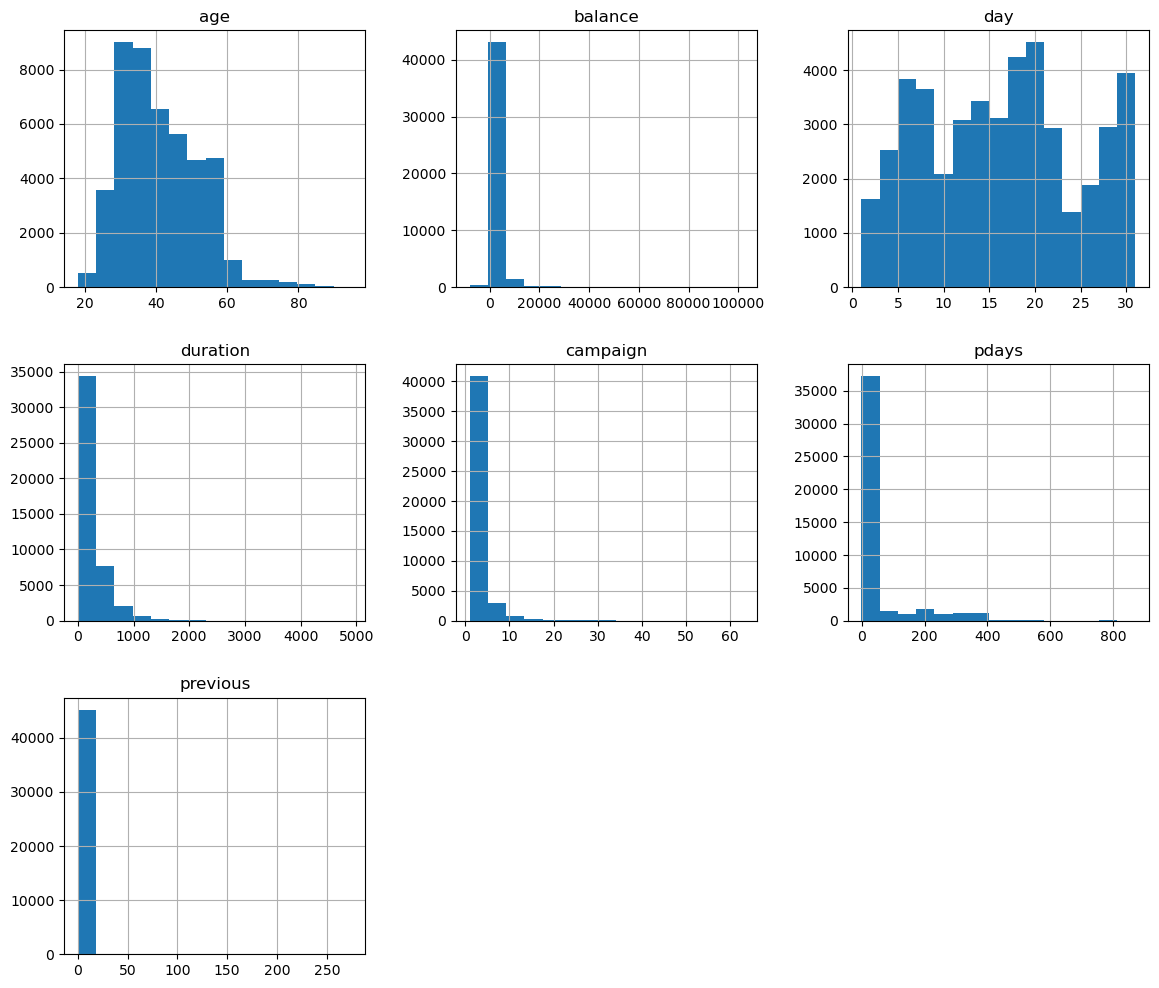

age - Skewness: 0.6848179257252598, Kurtosis: 0.3195703759105042
balance - Skewness: 8.360308326166326, Kurtosis: 140.75154662504158
day - Skewness: 0.09307901402122411, Kurtosis: -1.0598973728286003
duration - Skewness: 3.144318099423456, Kurtosis: 18.153915269019706
campaign - Skewness: 4.898650166179674, Kurtosis: 39.2496508023021
pdays - Skewness: 2.6157154736563477, Kurtosis: 6.935195210422799
previous - Skewness: 41.84645447266292, Kurtosis: 4506.860660183261


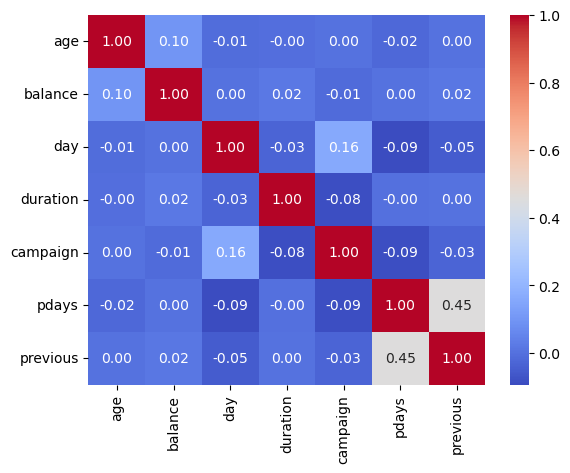

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64
Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.34      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564

Logistic Regression - ROC AUC Score: 0.9064225464012868


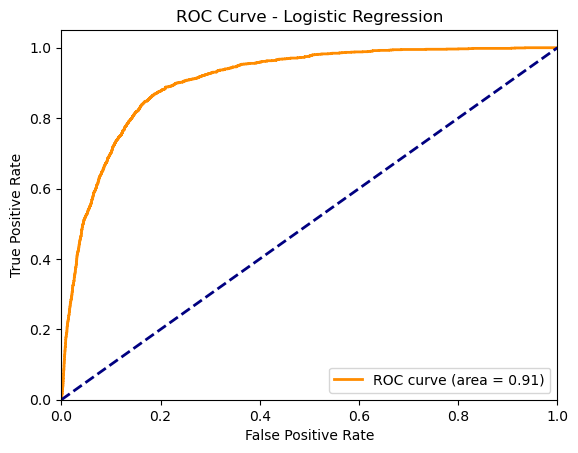

Optimized Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564

Optimized Logistic Regression - ROC AUC Score: 0.9064366665083821
Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.66      0.41      0.51      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.89      0.91      0.90     13564

Random Forest - ROC AUC Score: 0.9273896503171168
Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score

# Load the dataset
file_path = '/Users/jake/ML/bank-full.csv'
df = pd.read_csv(file_path, sep=';')

# Exploratory Data Analysis (EDA)
# 1. Data overview
print(df.info())
print(df.describe())

# 2. Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 3. Distribution of numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(figsize=(14, 12), bins=15)
plt.show()

# 4. Checking skewness and kurtosis
for col in numerical_columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f'{col} - Skewness: {skewness}, Kurtosis: {kurtosis}')

# 5. Correlation matrix and multicollinearity check
# Only select numerical columns for the correlation matrix
numerical_data = df[numerical_columns]
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# 6. Value count of the target variable
print(df['y'].value_counts(normalize=True))

# 7. Splitting features and target variable
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# 8. Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# 9. Preprocessing pipeline with Imputation
# Impute missing values for numerical data with mean and for categorical with the most frequent value
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
            ('scaler', StandardScaler())
        ]), numerical_columns),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
            ('encoder', OneHotEncoder())
        ]), categorical_columns)
    ])

# Task 1: Logistic Regression Model with Pipeline
# Create a pipeline with preprocessor and logistic regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
log_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred = log_reg_pipeline.predict(X_test)

# Evaluation
print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred))
print("Logistic Regression - ROC AUC Score:", roc_auc_score(y_test, log_reg_pipeline.predict_proba(X_test)[:,1]))

# Manual ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, log_reg_pipeline.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, log_reg_pipeline.predict_proba(X_test)[:,1]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Task 2: Hyperparameter Tuning
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg_pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best model evaluation
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test)

print("Optimized Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_best))
print("Optimized Logistic Regression - ROC AUC Score:", roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:,1]))

# Task 3: Ensemble Models with Pipelines
# Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest - ROC AUC Score:", roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:,1]))

# Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("Gradient Boosting - Classification Report")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting - ROC AUC Score:", roc_auc_score(y_test, gb_pipeline.predict_proba(X_test)[:,1]))

# Task 4: Model Comparison
print("Comparing Models Based on Recall Score")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred)}")
print(f"Optimized Logistic Regression Recall: {recall_score(y_test, y_pred_best)}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf)}")
print(f"Gradient Boosting Recall: {recall_score(y_test, y_pred_gb)}")

# Final Model Selection based on Recall
best_model = max([
    ('Logistic Regression', recall_score(y_test, y_pred)),
    ('Optimized Logistic Regression', recall_score(y_test, y_pred_best)),
    ('Random Forest', recall_score(y_test, y_pred_rf)),
    ('Gradient Boosting', recall_score(y_test, y_pred_gb))
], key=lambda x: x[1])

print(f"The best model based on Recall is: {best_model[0]} with a Recall of {best_model[1]}")


# Predicting Term Deposit Subscriptions

## 1. Introduction

This report details the process of predicting whether clients will subscribe to a term deposit, using data from a Portuguese banking institution. The primary focus was on minimizing false negatives, where potential subscribers are incorrectly predicted as non-subscribers. To achieve this, we conducted a thorough Exploratory Data Analysis (EDA), implemented imputation to handle missing data, built and evaluated multiple models, and provided business recommendations based on the results.

## 2. Data Preprocessing

### 2.1 Data Loading and Overview

The dataset was loaded from the specified path, and an initial overview was conducted to understand its structure, including:

- **Data Types**: Identified as a mix of numerical and categorical variables.
- **Missing Values**: The presence of missing values was checked to determine if imputation was necessary.

### 2.2 Handling Missing Values with Imputation

Missing values were identified, and imputation was applied to ensure that the models could be trained without any loss of information:

- **Numerical Columns**: Missing values in numerical columns were imputed using the mean of the respective columns. This approach helps maintain the central tendency of the data.
- **Categorical Columns**: Missing values in categorical columns were imputed using the most frequent category. This method preserves the most common category in each column, minimizing the impact of missing data.

### 2.3 Feature Encoding and Scaling

Given the presence of both categorical and numerical variables, the following preprocessing steps were applied:

- **Categorical Encoding**: Categorical variables were converted into a numerical format using OneHotEncoding. This technique creates binary columns for each category, allowing categorical data to be used in the model.
- **Numerical Scaling**: Numerical variables were scaled using StandardScaler to ensure they were on the same scale, which is particularly important for algorithms sensitive to feature scaling.

### 2.4 Correlation and Multicollinearity Analysis

To understand relationships between variables:

- **Correlation Matrix**: A correlation matrix was computed for the numerical variables, and a heatmap was used to visualize potential multicollinearity. This step helped in identifying pairs of features that might be highly correlated, which could affect model performance.

### 2.5 Target Variable Balance

The target variable (`y`) was examined to assess the balance between the classes:

- **Class Imbalance**: The target variable was found to be imbalanced, with a smaller proportion of clients subscribing to term deposits. This insight was crucial in selecting recall as the primary performance metric to minimize false negatives.

## 3. Model Building and Evaluation

### 3.1 Logistic Regression

**Initial Model**:
- A logistic regression model was built as a baseline. The model was evaluated using precision, recall, F1-score, and ROC AUC, with an emphasis on recall due to the need to minimize false negatives.

**Hyperparameter Tuning**:
- Hyperparameter tuning was performed using GridSearchCV, focusing on optimizing the recall score. This step aimed to enhance the model’s ability to correctly identify potential subscribers.

### 3.2 Ensemble Models

To explore more advanced modeling techniques, two ensemble models were built and evaluated:

- **Random Forest**: This model, known for its robustness, was trained and evaluated. The ensemble approach helped capture more complex patterns in the data.
- **Gradient Boosting**: Gradient Boosting, another powerful ensemble method, was also implemented. It provided strong predictive performance by iteratively correcting errors made by previous models.

### 3.3 Model Evaluation Metrics

Across all models, the following metrics were used to assess performance:

- **Recall**: The primary focus, given its importance in minimizing false negatives.
- **Precision**: Assessed alongside recall to understand the balance between false positives and false negatives.
- **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of the model’s accuracy.
- **ROC AUC**: Used to evaluate the model’s ability to distinguish between classes, with ROC curves plotted for visual analysis.

### 3.4 Final Model Selection

The models were compared based on their recall scores. The model with the highest recall was selected as the optimal model, ensuring the best performance in identifying clients likely to subscribe to a term deposit.

## 4. Business Recommendations

Based on the analysis and model results, the following business recommendations were made:

### 4.1 Focus Marketing Efforts on High-Recall Segments

**Action**: Use the model to identify clients with a high probability of subscribing to a term deposit. These clients should be targeted with personalized marketing campaigns.

**Benefit**: This approach will increase conversion rates and optimize marketing spend by concentrating efforts on high-potential clients.

### 4.2 Improve Customer Retention Strategies

**Action**: Enhance customer engagement strategies for those predicted as potential subscribers but have not yet committed. Personalized follow-up communications or special offers could be effective.

**Benefit**: This will not only improve short-term subscription rates but also contribute to long-term customer loyalty.

### 4.3 Evaluate and Adjust Marketing Strategies Based on Model Insights

**Action**: Regularly review the model’s predictions to gain insights into customer behavior. Adjust marketing strategies accordingly to reflect these insights.

**Benefit**: Continual refinement based on data-driven insights will lead to more effective marketing campaigns and higher subscription rates.

### 4.4 Monitor Model Performance Over Time

**Action**: As customer behavior and market conditions change, regularly monitor and retrain the model. Update it with new data to maintain its accuracy and relevance.

**Benefit**: This will ensure that the model continues to perform well in identifying potential subscribers, keeping the bank’s marketing efforts effective and up-to-date.

### 4.5 Addressing Imbalance in the Target Variable

**Action**: Consider strategies to increase the proportion of subscribers, such as offering more attractive terms or personalized recommendations.

**Benefit**: This could help balance the dataset over time, making future predictions even more accurate and improving overall subscription rates.

## 5. Conclusion

The adoption of a data-driven approach, guided by the predictive model, will allow the bank to allocate its marketing resources more efficiently, enhance customer engagement, and ultimately increase the subscription rates for term deposits. Continuous evaluation and adjustment based on model feedback will ensure sustained success in the bank’s marketing efforts.
